In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime


In [616]:
orders = pd.read_csv(r"/Users/tiko/Documents/Machine Learning Lab/Orders.csv")
returns = pd.read_csv(r"/Users/tiko/Documents/Machine Learning Lab/Returns.csv")


In [617]:
pd.set_option("display.max_columns",999)  # to display all the columns int he output
#pd.set_option("display.max_rows",999)

In [618]:
'''
Roadmap:

1. EDA
2. Seasonality (use order.Date to determine seasons and then calculate seasonality trends)
3. Combining Datasets
4. Binary Classification ML


'''

'\nRoadmap:\n\n1. EDA\n2. Seasonality (use order.Date to determine seasons and then calculate seasonality trends)\n3. Combining Datasets\n4. Binary Classification ML\n\n\n'

In [619]:
orders.head()

#Getting familiar with the data and the columns and what they rerpresent

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,Country,Region,Market,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [620]:
# Getting some preliminary information

orders.info()

'''
Some columns will need to be converted to numeric or datetime objects

'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row.ID          51290 non-null  int64  
 1   Order.ID        51290 non-null  object 
 2   Order.Date      51290 non-null  object 
 3   Ship.Date       51290 non-null  object 
 4   Ship.Mode       51290 non-null  object 
 5   Customer.ID     51290 non-null  object 
 6   Customer.Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   Postal.Code     9994 non-null   float64
 9   City            51290 non-null  object 
 10  State           51290 non-null  object 
 11  Country         51290 non-null  object 
 12  Region          51290 non-null  object 
 13  Market          51290 non-null  object 
 14  Product.ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub.Category    51290 non-null  object 
 17  Product.Name    51290 non-null 

'\nSome columns will need to be converted to numeric or datetime objects\n\n'

In [621]:
'''
Converting "Profit" & "Sales" columns into a numeric type.
First, we need to remove the '$' and ',' signs so that we do not have any interpretation problems.

+

Converting "Order.Date" and "Ship.Date" column into a datetime object using pandas.


'''

columns = ['Profit', 'Sales', 'Order.Date', 'Ship.Date']
def to_num(columns):
    
    for col in columns:  
        if 'Date' not in col:
            orders[col] = orders[col].str.replace('$', '').str.replace(',', '').astype(float)
        else:
            orders[col] =  pd.to_datetime(orders[col])

to_num(columns)    

    

/var/folders/r1/cq24m6mn5j1c896ftltp3tjw0000gn/T/ipykernel_51224/1095352920.py:17: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  orders[col] = orders[col].str.replace('$', '').str.replace(',', '').astype(float)


In [623]:
orders['Month'] = orders['Order.Date'].dt.month
orders['Year'] = orders['Order.Date'].dt.year

In [624]:
orders.describe() 

'''
Attaining some informaotion for all of our numeric columns

'''

'\nAttaining some informaotion for all of our numeric columns\n\n'

In [625]:
orders.isna().sum() # Finding columns with NA Values

Row.ID                0
Order.ID              0
Order.Date            0
Ship.Date             0
Ship.Mode             0
Customer.ID           0
Customer.Name         0
Segment               0
Postal.Code       41296
City                  0
State                 0
Country               0
Region                0
Market                0
Product.ID            0
Category              0
Sub.Category          0
Product.Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping.Cost         0
Order.Priority        0
Month                 0
Year                  0
dtype: int64

In [579]:
'''
Some of the columns do not provide significant meaning to our EDA. I will drop them as deemed necessary based on 
EDA.



Row.ID --> Provides no significant information
Postal.code --> More than 41,000 NA values. Based on current information, there is no way to engineer the proper
postal codes.


'''



drop_column = ["Row.ID", "Postal.Code"]
def drop_cols(column_name):
    for col in column_name:
        orders.drop(col, axis = 1, inplace=True)
        
    
drop_cols(drop_column)


In [626]:
orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,Country,Region,Market,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Month,Year
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,11,2014
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical,2,2014
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium,10,2014
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium,1,2014
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical,11,2014


In [581]:
orders.isna().sum() 
# No Na values in any of our columns after dropping "Postal.Code"

Order.ID          0
Order.Date        0
Ship.Date         0
Ship.Mode         0
Customer.ID       0
Customer.Name     0
Segment           0
City              0
State             0
Country           0
Region            0
Market            0
Product.ID        0
Category          0
Sub.Category      0
Product.Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping.Cost     0
Order.Priority    0
dtype: int64

In [582]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order.ID        51290 non-null  object        
 1   Order.Date      51290 non-null  datetime64[ns]
 2   Ship.Date       51290 non-null  datetime64[ns]
 3   Ship.Mode       51290 non-null  object        
 4   Customer.ID     51290 non-null  object        
 5   Customer.Name   51290 non-null  object        
 6   Segment         51290 non-null  object        
 7   City            51290 non-null  object        
 8   State           51290 non-null  object        
 9   Country         51290 non-null  object        
 10  Region          51290 non-null  object        
 11  Market          51290 non-null  object        
 12  Product.ID      51290 non-null  object        
 13  Category        51290 non-null  object        
 14  Sub.Category    51290 non-null  object        
 15  Pr

In [583]:
orders["Customer.ID"].value_counts()

SV-203651406    26
WB-218501404    24
AP-109151404    23
EM-1396082      21
CS-121757       20
                ..
LW-7215110       1
XP-2186531       1
FP-14320139      1
JK-16090101      1
MC-1810093       1
Name: Customer.ID, Length: 17415, dtype: int64

<AxesSubplot:xlabel='Category', ylabel='Count'>

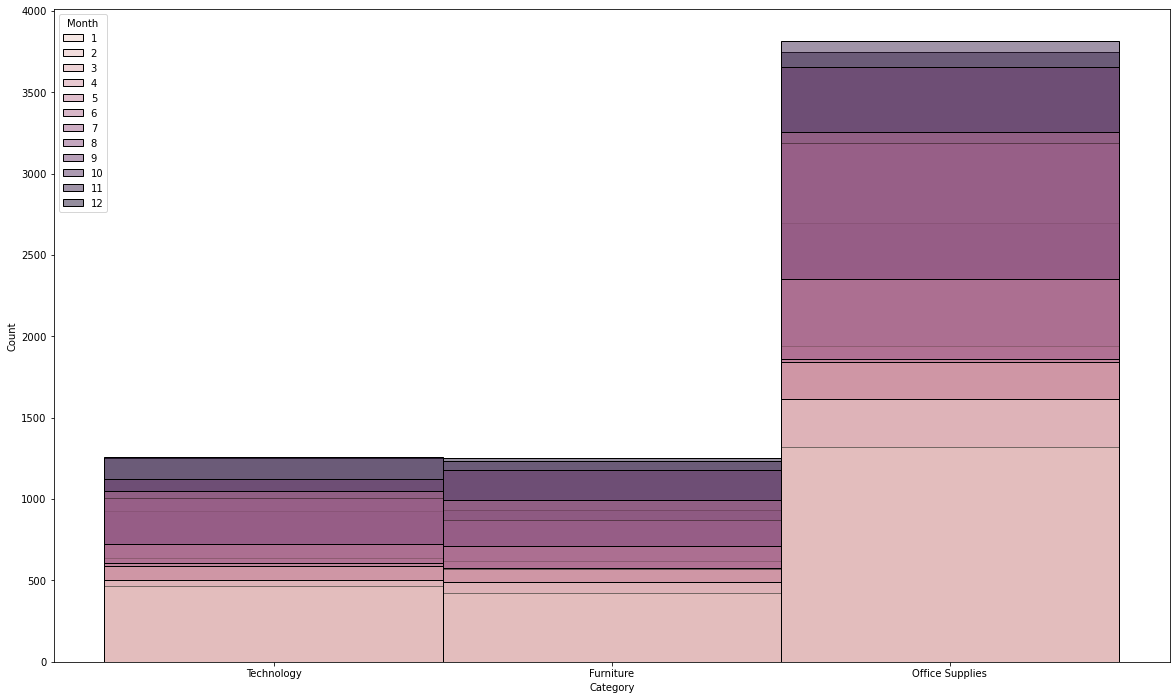

In [637]:
plt.figure(figsize = (20,12))
sns.histplot(data = orders, x ="Category",hue ="Month")

# We can see that sales for "Office Supplies is much greater than for Furniture and Technology"
#and we see that months 8-12 are pretty good

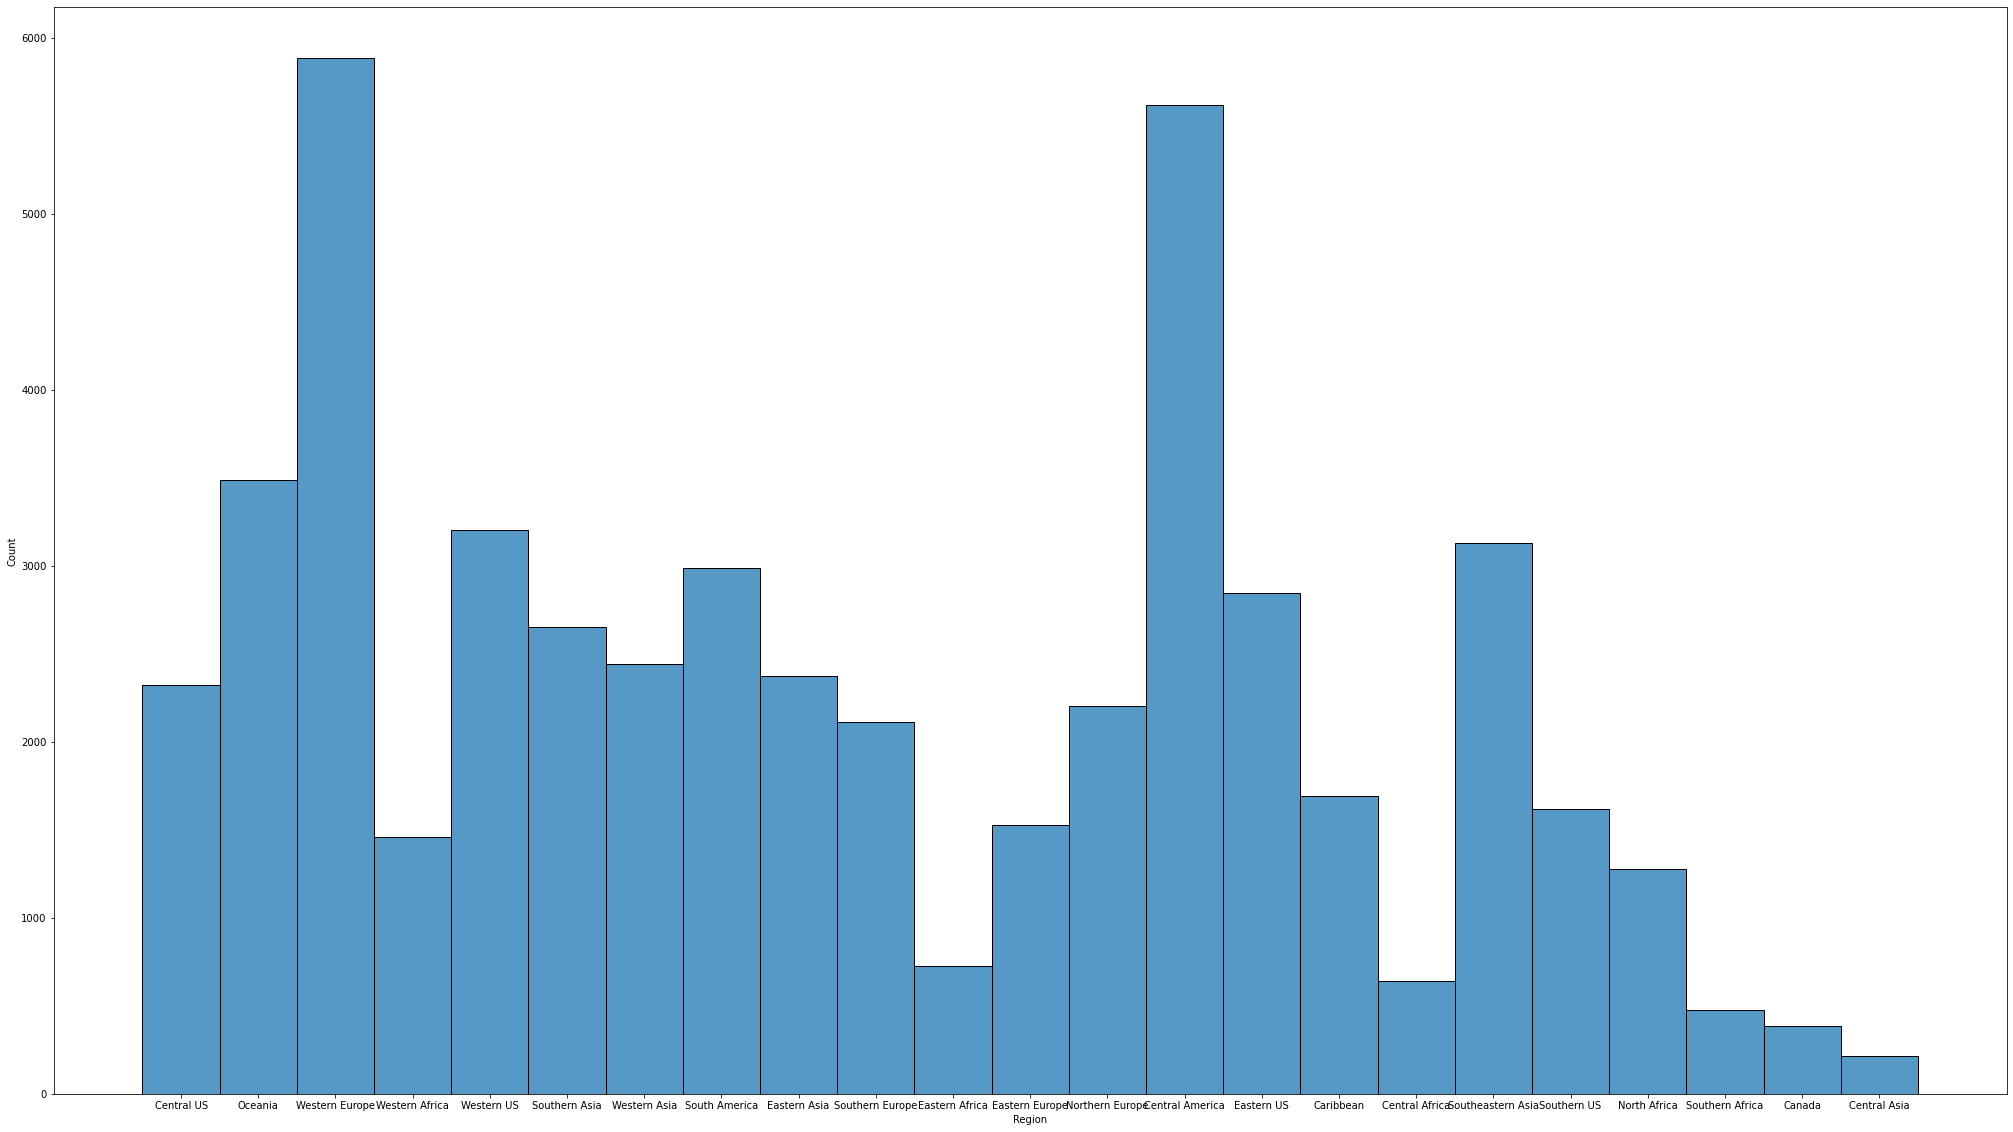

In [585]:
plt.figure(figsize = (35,20))
sns.histplot(data = orders, x ="Region");

In [586]:
orders.head()

,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,City,State,Country,Region,Market,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
2,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium
3,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium
4,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical


In [629]:
season = orders.groupby([orders["Order.Date"].dt.month, "Category"]).sum()
season

Row.ID  Postal.Code      Sales  Quantity  \
Order.Date Category                                                      
1          Furniture        12689244    4614285.0  228829.15      1750   
           Office Supplies  45191860   12903363.0  222428.77      5480   
           Technology       13587811    3982838.0  225531.38      1642   
2          Furniture        11089801    4118202.0  190255.60      1494   
           Office Supplies  36684342    9994734.0  157169.49      4340   
           Technology       12311408    3648532.0  207225.12      1595   
3          Furniture        14019457    7287982.0  250388.41      2098   
           Office Supplies  49444914   21998276.0  224884.15      6283   
           Technology       15628834    7472614.0  285245.78      2009   
4          Furniture        14335205    7453416.0  210529.31      2005   
           Office Supplies  47331040   20982572.0  226586.55      6391   
           Technology       14260533    6062871.0  258863.00      2070   
5          Furniture        17935541    8357285.0  285390.71      2484   
           Office Supplies  61521662   24598870.0  283526.00      8170   
           Technology       18804408    7970455.0  346576.53      2542   
6          Furniture        23258990    7475602.0  409439.17      3434   
           Office Supplies  82772044   23153419.0  369467.36     11012   
           Technology       25874524    6787907.0  483174.76      3563   
7          Furniture        14802042    8981807.0  227072.62      2157   
           Office Supplies  52250216   22382762.0  236415.51      6618   
           Technology       16495272    7103285.0  288818.33      2271   
8          Furniture        22900336    7159885.0  391224.77      3059   
           Office Supplies  85453830   25635646.0  404230.43     11019   
           Technology       26254867    7773788.0  498860.35      3518   
9          Furniture        28669873   15079344.0  493576.73      4111   
           Office Supplies  95018262   47338267.0  423979.50     12572   
           Technology       28373619   11932748.0  514197.78      3796   
10         Furniture        20518083   10574869.0  383938.11      3323   
           Office Supplies  62827495   27909498.0  308247.41      9585   
           Technology       21725998    9824327.0  493042.59      3395   
11         Furniture        29746553   17729757.0  508488.90      4471   
           Office Supplies  99714206   46767685.0  462687.18     13529   
           Technology       33188177   15543675.0  575552.81      4379   
12         Furniture        30951092   18330831.0  531319.55      4506   
           Office Supplies  97748556   48140541.0  467873.11     13245   
           Technology       31977600   14500714.0  567470.33      4396   

                            Discount    Profit  Shipping.Cost  Month     Year  
Order.Date Category                                                            
1          Furniture          80.820  14224.86    23256.43500    491   988772  
           Office Supplies   218.930  30885.57    23154.36600   1616  3254290  
           Technology         65.372  28330.02    24814.38800    504  1014993  
2          Furniture          66.590  18321.97    20880.32100    848   853833  
           Office Supplies   175.950  22224.46    17927.63200   2638  2656169  
           Technology         65.034  32385.75    21070.32700    932   938401  
3          Furniture         103.230  17863.18    25044.62100   1722  1155938  
           Office Supplies   246.260  35295.72    24473.35900   5529  3711431  
           Technology         82.864  38714.55    27205.94404   1770  1188113  
4          Furniture         103.210   9864.11    23838.71400   2276  1145848  
           Office Supplies   264.550  28650.89    24328.14600   7436  3743610  
           Technology         80.386  35307.57    26906.00600   2416  1216306  
5          Furniture         123.100  13908.17    32910.86800   3565  1435851  
           Office

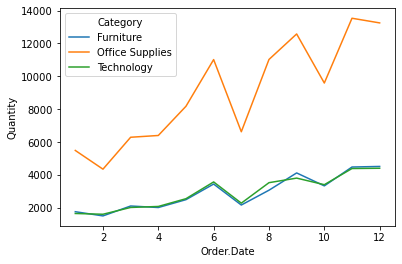

In [632]:
sns.lineplot(data = season, x = 'Order.Date', y = "Quantity", hue = "Category");


<AxesSubplot:xlabel='Order.Date', ylabel='Sales'>

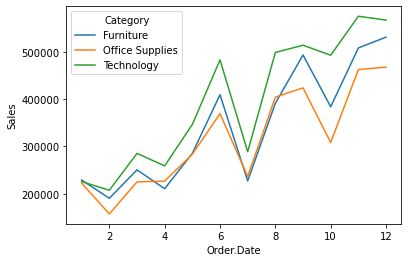

In [589]:
sns.lineplot(data = season, x = 'Order.Date', y = "Sales", hue = "Category")

In [590]:
'''
We are seeing some Uniformal trends. In the month of January, There is a slowdown of orders for all three catoegories,
which can be attributed to the holiday season winding down (Thanksgiving, Black Friday, Christmans, New Year) and 
shoppers experiencing financial hesitancy. 

After that we see a gradual increase in February-March (Tax Season) followed by a rapid rise from April to June. 




'''

'\nWe are seeing some Uniformal trends. In the month of January, There is a slowdown of orders for all three catoegories,\nwhich can be attributed to the holiday season winding down (Thanksgiving, Black Friday, Christmans, New Year) and \nshoppers experiencing financial hesitancy. \n\nAfter that we see a gradual increase in February-March (Tax Season) followed by a rapid rise from April to June. \n\n\n\n\n'

In [640]:
# Part 3  --> Merging DataFrames.


'''
New merged dataframe based 

'''

orders = pd.merge(orders, returns,how="left", left_on=["Order.ID"], right_on=["Order ID"])
orders.drop(["Order ID", "Region_y"], axis=1, inplace=True) #dropping unnecessary/duplicate columns
orders["Returned"] = orders["Returned"].fillna("No") # replacing nan values indicating "not returned" with "No"


In [641]:
orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,Country,Region_x,Market,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Month,Year,Returned
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,11,2014,No
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical,2,2014,No
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium,10,2014,No
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium,1,2014,No
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical,11,2014,No


In [642]:
orders["Returned"] = orders["Returned"].astype('category')


In [643]:
orders["Returned"].value_counts()

No     49070
Yes     2220
Name: Returned, dtype: int64

In [644]:
# How much profit did we lose due to returns each year?

orders[orders["Returned"] == "Yes"].groupby([orders["Order.Date"].dt.year]).sum()[["Profit"]]




,Profit
Order.Date,
2012,17477.26
2013,9269.89
2014,17510.63
2015,17112.97


In [596]:
orders[orders["Returned"]=="Yes"]["Profit"].sum()

# We lost $61,370.75 in profits due to returned Items. Not accounting for Shipping Cost and item damage/etc..

61370.75

In [646]:
 #How many customer returned more than once? more than 5 times? --> Groupby customer 

df = orders[orders["Returned"] == "Yes"] #dataframe for everyone that returned 
cust_returned = df["Customer.ID"].value_counts()
print("Number of customers that returned more than once: ",cust_returned [cust_returned >1].count())
print("Number of customers that returned more than 5 times: ",cust_returned [cust_returned >5].count())

Number of customers that returned more than once:  547
Number of customers that returned more than 5 times:  46


In [652]:
return_count = orders[orders["Returned"].astype(bool)][['Customer.ID', 'Order.ID', "Returned"]].drop_duplicates().value_counts()


sum(return_count>1)

0

In [598]:
#	3. Which regions are more likely to return orders? groupby region


(df.groupby("Region_x")["Returned"].count()/ orders.groupby("Region_x")["Returned"].count()).sort_values(ascending = False).head(10)


# df.groupby("Region_x")["Returned"].sum().sort_values(ascending=False)/len(orders[])



Region_x
Western US           0.055261
Eastern Asia         0.055181
Southern Europe      0.053005
Southern Africa      0.052301
Southern US          0.051235
Eastern US           0.047051
Southeastern Asia    0.044743
South America        0.044511
Western Asia         0.044262
Oceania              0.044164
Name: Returned, dtype: float64

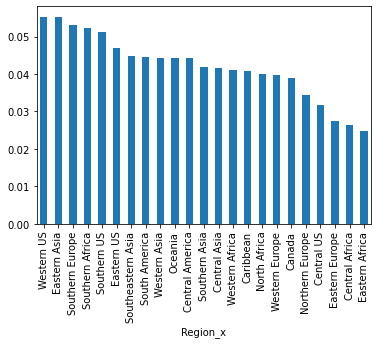

In [655]:
(df.groupby("Region_x")["Returned"].count()/ orders.groupby("Region_x")["Returned"].count()).sort_values(ascending = False).plot.bar();
#Graph showing the ratio of return based on region

In [599]:
#Which categories (sub-categories) of products are more likely to be returned? groupby 

df.groupby(["Category", "Sub.Category"])[['Returned']].count().sort_values(by =["Category", "Sub.Category"], ascending = False)

Returned
Category        Sub.Category          
Technology      Phones             145
                Machines            63
                Copiers             99
                Accessories        138
Office Supplies Supplies           103
                Storage            212
                Paper              150
                Labels             137
                Fasteners          102
                Envelopes           99
                Binders            269
                Art                217
                Appliances          59
Furniture       Tables              41
                Furnishings        135
                Chairs             147
                Bookcases          104

In [662]:
orders.groupby("Category").agg({"Returned":['count']})



,Returned
,count
Category,
Furniture,9860
Office Supplies,31289
Technology,10141


In [658]:
orders["Category"]

0             Technology
1              Furniture
2             Technology
3             Technology
4             Technology
              ...       
51285    Office Supplies
51286          Furniture
51287    Office Supplies
51288    Office Supplies
51289    Office Supplies
Name: Category, Length: 51290, dtype: object

In [663]:
# MACHINE LEARNING

#Create new column that shows duration between order date and ship date

orders["Process.Time"] = orders["Ship.Date"] - orders["Order.Date"]
orders['Process.Time'] = orders['Process.Time'].dt.days
orders.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 51290 entries, 0 to 51289
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row.ID          51290 non-null  int64         
 1   Order.ID        51290 non-null  object        
 2   Order.Date      51290 non-null  datetime64[ns]
 3   Ship.Date       51290 non-null  datetime64[ns]
 4   Ship.Mode       51290 non-null  object        
 5   Customer.ID     51290 non-null  object        
 6   Customer.Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   Postal.Code     9994 non-null   float64       
 9   City            51290 non-null  object        
 10  State           51290 non-null  object        
 11  Country         51290 non-null  object        
 12  Region_x        51290 non-null  object        
 13  Market          51290 non-null  object        
 14  Product.ID      51290 non-null  object        
 15  Ca

In [669]:
orders

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,Country,Region_x,Market,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Month,Year,Returned_x,Process.Time,Returned_Count
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.770,High,11,2014,No,2,0.0
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.630,Critical,2,2014,No,2,2.0
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.490,Medium,10,2014,No,1,2.0
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.160,Medium,1,2014,No,2,0.0
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.040,Critical,11,2014,No,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2015-KE1642066-42174,2015-06-19,2015-06-19,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,Hiroshima,Japan,Eastern Asia,Asia Pacific,OFF-FA-3072,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.10,5,0.0,4.50,1.010,Medium,6,2015,No,0,1.0
51286,34337,US-2014-ZD21925140-41765,2014-05-06,2014-05-10,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,Tennessee,United States,Southern US,USCA,FUR-FU-4070,Furniture,Furnishings,"Eldon Image Series Desk Accessories, Burgundy",16.72,5,0.2,3.34,1.930,High,5,2014,No,4,0.0
51287,31315,CA-2012-ZD21925140-41147,2012-08-26,2012-08-31,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,California,United States,Western US,USCA,OFF-AR-5321,Office Supplies,Art,Newell 341,8.56,2,0.0,2.48,1.580,High,8,2012,No,5,0.0
51288,9596,MX-2013-RB1979518-41322,2013-02-17,2013-02-21,Standard Class,RB-1979518,Ross Baird,Home Office,NaN,Valinhos,São Paulo,Brazil,South America,LATAM,OFF-BI-2919,Office Supplies,Binders,"Acco Index Tab, Economy",13.44,2,0.0,2.40,1.003,Medium,2,2013,No,4,2.0


In [670]:
# optional

orders[orders['Returned_x']=="Yes"].groupby('Product.ID').sum()[['Quantity']]





,Quantity
Product.ID,
FUR-BO-3176,7
FUR-BO-3615,1
FUR-BO-3616,2
FUR-BO-3621,3
FUR-BO-3624,8
...,...
TEC-PH-6348,6
TEC-PH-6364,5
TEC-PH-6365,2


In [664]:
count_prodID = df.groupby("Product.ID")[["Returned"]].count().reset_index()
count_prodID

,Product.ID,Returned
0,FUR-BO-3176,1
1,FUR-BO-3615,1
2,FUR-BO-3616,1
3,FUR-BO-3621,1
4,FUR-BO-3624,2
...,...,...
1489,TEC-PH-6348,1
1490,TEC-PH-6364,1
1491,TEC-PH-6365,1
1492,TEC-PH-6413,1


In [665]:
orders = orders.merge(count_prodID,how="left", left_on=["Product.ID"], right_on=["Product.ID"])

In [666]:
orders = orders.rename(columns={'Returned_y': 'Returned_Count'})


In [671]:
orders["Returned_Count"].fillna(0, inplace=True)
orders.head()
orders["Returned_Count"].value_counts()


0.0     21535
1.0     16007
2.0      8351
3.0      3715
4.0       869
5.0       379
12.0      227
6.0       130
9.0        77
Name: Returned_Count, dtype: int64

In [ ]:
# SAME AS 

# product_returns = orders[orders['Returned']==1].groupby('Product.ID').sum()['Quantity']
# orders['N_Returns'] = orders['Product.ID'].map(product_returns)
# orders['N_Returns'] = orders['N_Returns'].fillna(0)

In [675]:
drop_column = ["Row.ID", "Postal.Code", "Order.Date",]
def drop_cols(column_name):
    for col in column_name:
        orders.drop(col, axis = 1, inplace=True)
        
    
drop_cols(drop_column)

In [676]:
orders.columns

Index(['Order.ID', 'Ship.Date', 'Ship.Mode', 'Customer.ID', 'Customer.Name',
       'Segment', 'City', 'State', 'Country', 'Region_x', 'Market',
       'Product.ID', 'Category', 'Sub.Category', 'Product.Name', 'Sales',
       'Quantity', 'Discount', 'Profit', 'Shipping.Cost', 'Order.Priority',
       'Month', 'Year', 'Returned_x', 'Process.Time', 'Returned_Count'],
      dtype='object')

In [690]:
#Creating dummy variables for our features

numerical = ['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping.Cost',
            'Year', 'Month', 'Process.Time', 'Returned_Count']

categorical = ["Ship.Mode", "Segment","Region_x","Category","Sub.Category"]

dummies = pd.get_dummies(orders[categorical], drop_first = True)
x = pd.concat((orders[numerical], dummies),axis=1)
y = orders['Returned_x']


In [681]:
#ML Model using LogisticRegression


#Model Training
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#Model Evaluation
from sklearn.metrics import precision_score, recall_score, confusion_matrix


In [694]:
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=.2,stratify=y)






In [695]:
logit = LogisticRegression(max_iter = 100000)
logit.fit(train_x, train_y)


In [673]:
orders.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region_x', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority', 'Month', 'Year',
       'Returned_x', 'Process.Time', 'Returned_Count'],
      dtype='object')

In [696]:
# Problems

# Don't feature engineer from hthe target column
